# Implementation 

In [30]:
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exercise-CarData.csv')
# Check type of all columns
print(dataset.dtypes)
print()
dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unnamed: 0      int64
Price           int64
Age           float64
KM             object
FuelType       object
HP             object
MetColor      float64
Automatic       int64
CC              int64
Doors          object
Weight          int64
dtype: object



,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [31]:
# Check how many nan values in each column
for col_name,col_val in dataset.iteritems():
  print("nan values in column (",col_name,") is : ",dataset[col_name].isna().sum())

  x = dataset.iloc[:, ~dataset.columns.isin(['Price'])].values
print("Features (x) : \n",x)
print()

# label ( as y )
y = dataset.iloc[:,1].values
print("Size of y : ",y.size)
print("Label (y) :",y)

# x_new for performing scalling
x_new = dataset.iloc[:, ~dataset.columns.isin(['FuelType','Doors','Price'])].values
print("\nx_new : \n",x_new)


nan values in column ( Unnamed: 0 ) is :  0
nan values in column ( Price ) is :  0
nan values in column ( Age ) is :  100
nan values in column ( KM ) is :  0
nan values in column ( FuelType ) is :  100
nan values in column ( HP ) is :  0
nan values in column ( MetColor ) is :  150
nan values in column ( Automatic ) is :  0
nan values in column ( CC ) is :  0
nan values in column ( Doors ) is :  0
nan values in column ( Weight ) is :  0
Features (x) : 
 [[0 23.0 '46986' ... 2000 'three' 1165]
 [1 23.0 '72937' ... 2000 '3' 1165]
 [2 24.0 '41711' ... 2000 '3' 1165]
 ...
 [1433 nan '17016' ... 1300 '3' 1015]
 [1434 70.0 '??' ... 1300 '3' 1015]
 [1435 76.0 '1' ... 1600 '5' 1114]]

Size of y :  1436
Label (y) : [13500 13750 13950 ...  8500  7250  6950]

x_new : 
 [[0 23.0 '46986' ... 0 2000 1165]
 [1 23.0 '72937' ... 0 2000 1165]
 [2 24.0 '41711' ... 0 2000 1165]
 ...
 [1433 nan '17016' ... 0 1300 1015]
 [1434 70.0 '??' ... 0 1300 1015]
 [1435 76.0 '1' ... 0 1600 1114]]


In [32]:
# # min max normalization

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(x_new)
# print("\n\nScaled X : \n", X_scaled)

handle Categorial Data

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
dataset


print("Input (Features) :\n",x)
print()
print("Output (Label) :\n",y)

# label encoder
le = LabelEncoder()
x[ : ,3] = le.fit_transform(x[ : ,3])
print("\n\nInput : \n", x[:,3])

Input (Features) :
 [[0 23.0 '46986' ... 2000 'three' 1165]
 [1 23.0 '72937' ... 2000 '3' 1165]
 [2 24.0 '41711' ... 2000 '3' 1165]
 ...
 [1433 nan '17016' ... 1300 '3' 1015]
 [1434 70.0 '??' ... 1300 '3' 1015]
 [1435 76.0 '1' ... 1600 '5' 1114]]

Output (Label) :
 [13500 13750 13950 ...  8500  7250  6950]


Input : 
 [1 1 1 ... 2 3 2]


In [34]:
# Step 4b: Use dummy variables from pandas library to create one column for each FuelType

dummy = pd.get_dummies(dataset['FuelType'])
print("\n\nDummy :\n",dummy)
dataset = dataset.drop(['FuelType'],axis=1)
# dataset = pd.concat([dummy,dataset],axis=1)
dataset.insert(loc = 4,
               column = 'CNG',
               value = dummy.iloc[:,0])
dataset.insert(loc = 5,
               column = 'Diesel',
               value = dummy.iloc[:,1])
dataset.insert(loc = 6,
               column = 'Petrol',
               value = dummy.iloc[:,2])
print("\n\nFinal Data :\n",dataset)

dataset



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       Unnamed: 0  Price   Age     KM  CNG  Diesel  Petrol   HP  MetColor  \
0              0  13500  23.0  46986    0       1       0   90       1.0   
1              1  13750  23.0  72937    0       1       0   90       1.0   
2              2  13950  24.0  41711    0       1       0   90       NaN   
3              3  14950  26.0  48000    0       1       0   90       0.0   
4              4  13750  30.0  38500    0       1       0   90       0.0   
...          ...    ...   ...    ...  ...     ...     ...  ...       ...   
1431        1431   7500   NaN  20544    0       0       1   86       1.0   
1432        1432  10845  72.

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,0,1,0,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,0,1,0,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,0,1,0,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,0,1,0,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,0,1,0,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,0,0,1,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,0,0,1,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,0,0,1,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,0,0,0,86,1.0,0,1300,3,1015


handel missing value

In [36]:
from sklearn.impute import SimpleImputer

dataset

print("Input (Features) :\n",x)
print()
print("Output (Label) :\n",y)

Input (Features) :
 [[0 23.0 '46986' ... 2000 'three' 1165]
 [1 23.0 '72937' ... 2000 '3' 1165]
 [2 24.0 '41711' ... 2000 '3' 1165]
 ...
 [1433 nan '17016' ... 1300 '3' 1015]
 [1434 70.0 '??' ... 1300 '3' 1015]
 [1435 76.0 '1' ... 1600 '5' 1114]]

Output (Label) :
 [13500 13750 13950 ...  8500  7250  6950]


In [37]:
data1 = pd.DataFrame(dataset)
data1.dropna(axis=0,how='any',inplace=True)
print("\nNew Data :",data1)
print()
data1.info()

print(dataset)
data2 = pd.DataFrame(dataset)
print(data2)


New Data :       Unnamed: 0  Price   Age     KM  CNG  Diesel  Petrol   HP  MetColor  \
0              0  13500  23.0  46986    0       1       0   90       1.0   
1              1  13750  23.0  72937    0       1       0   90       1.0   
3              3  14950  26.0  48000    0       1       0   90       0.0   
4              4  13750  30.0  38500    0       1       0   90       0.0   
5              5  12950  32.0  61000    0       1       0   90       0.0   
...          ...    ...   ...    ...  ...     ...     ...  ...       ...   
1429        1429   8950  78.0  24000    0       0       1   86       1.0   
1430        1430   8450  80.0  23000    0       0       1   86       0.0   
1432        1432  10845  72.0     ??    0       0       1   86       0.0   
1434        1434   7250  70.0     ??    0       0       0   86       1.0   
1435        1435   6950  76.0      1    0       0       1  110       0.0   

      Automatic    CC  Doors  Weight  
0             0  2000  three    1165

In [39]:
for col_name,col_val in data2.iteritems():
  if(col_name != "Price" and col_name != "CNG" and col_name != "Diesel" and col_name != "Petrol" and col_name != "Doors"):
    if(data2[col_name].isna().sum() != 0):
      data2[col_name] = data2[col_name].fillna(data2[col_name].mean())

data2

data3 = pd.DataFrame(dataset)
print(data3)    

imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
for i in range(0,len(data3.axes[1])):
  if(data3.iloc[:,i].isna().sum() > 0 and (data3.iloc[:,:i].dtype == "int64" or data3.iloc[:,:i].dtype == "float64")):
    imputer = imputer.fit(data3[:, i:i+1])
    data3.iloc[:,:i] = imputer.transform(data3.iloc[:,i:i+1])
data3

      Unnamed: 0  Price        Age     KM  CNG  Diesel  Petrol   HP  MetColor  \
0              0  13500  23.000000  46986    0       1       0   90  1.000000   
1              1  13750  23.000000  72937    0       1       0   90  1.000000   
2              2  13950  24.000000  41711    0       1       0   90  0.674961   
3              3  14950  26.000000  48000    0       1       0   90  0.000000   
4              4  13750  30.000000  38500    0       1       0   90  0.000000   
...          ...    ...        ...    ...  ...     ...     ...  ...       ...   
1431        1431   7500  55.672156  20544    0       0       1   86  1.000000   
1432        1432  10845  72.000000     ??    0       0       1   86  0.000000   
1433        1433   8500  55.672156  17016    0       0       1   86  0.000000   
1434        1434   7250  70.000000     ??    0       0       0   86  1.000000   
1435        1435   6950  76.000000      1    0       0       1  110  0.000000   

      Automatic    CC  Door

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.000000,46986,0,1,0,90,1.000000,0,2000,three,1165
1,1,13750,23.000000,72937,0,1,0,90,1.000000,0,2000,3,1165
2,2,13950,24.000000,41711,0,1,0,90,0.674961,0,2000,3,1165
3,3,14950,26.000000,48000,0,1,0,90,0.000000,0,2000,3,1165
4,4,13750,30.000000,38500,0,1,0,90,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.672156,20544,0,0,1,86,1.000000,0,1300,3,1025
1432,1432,10845,72.000000,??,0,0,1,86,0.000000,0,1300,3,1015
1433,1433,8500,55.672156,17016,0,0,1,86,0.000000,0,1300,3,1015
1434,1434,7250,70.000000,??,0,0,0,86,1.000000,0,1300,3,1015


correlation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   object 
 4   CNG         1436 non-null   uint8  
 5   Diesel      1436 non-null   uint8  
 6   Petrol      1436 non-null   uint8  
 7   HP          1436 non-null   object 
 8   MetColor    1436 non-null   float64
 9   Automatic   1436 non-null   int64  
 10  CC          1436 non-null   int64  
 11  Doors       1436 non-null   object 
 12  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 116.5+ KB


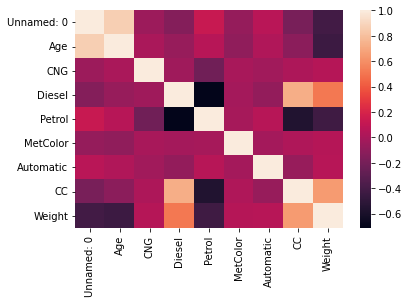

In [45]:
import seaborn as sns
dataset2 = pd.DataFrame(dataset)
dataset2.drop(dataset2.columns[[1,11]],axis=1,inplace=True)
dataset2

dataset.info()

corr = dataset2.corr()
corr.head(15)

sns.heatmap(corr)

# columns = np.full((corr.shape[0],), True, dtype=bool)
# for i in range(corr.shape[0]):
#   for j in range(i+1, corr.shape[0]):
#     if corr.iloc[i,j] >= 0.9:
#       if columns[j]:
#         columns[j] = False


# selected_columns = dataset2.columns[columns]
# selected_columns.shape

# data = dataset2[selected_columns]
# print(data)